In [1]:
using JLD2, FlavellBase, ImageDataIO, SegmentationTools, PyPlot, BehaviorDataNIR, HDF5, UNet2D, ProgressMeter, Random, Plots, NRRDIO, Statistics, StatsBase

┌ Warning: You are using a non-official build of Julia. This may cause issues with CUDA.jl.
│ Please consider using an official build from https://julialang.org/downloads/.
└ @ CUDA ~/.julia/packages/CUDA/75aiI/src/initialization.jl:180


WebIO._IJuliaInit()

### Pre-CropNet datasets

In [48]:
# Define base project directories
prj_5ht_dir = "/data3/prj_5ht/published_data/data_processed_neuropal"
prj_starvation_dir = "/data1/prj_starvation/data_processed"
prj_neuropal_dir = "/store1//prj_neuropal/data_processed"
prj_rim_dir = "/store1/prj_rim/data_processed"
prj_aversion_dir = "/data1/prj_aversion/data_processed"
prj_kfc_dir = "/data1/prj_kfc/data_processed"

# Create the dataset paths dictionary
dataset_paths = Dict(
    # prj_5ht datasets
    "2022-07-26-38" => "$(prj_5ht_dir)/2022-07-26-38_output",
    "2022-07-27-45" => "$(prj_5ht_dir)/2022-07-27-45_output",
    "2022-08-02-31" => "$(prj_5ht_dir)/2022-08-02-31_output",
    "2022-07-26-31" => "$(prj_5ht_dir)/2022-07-26-31_output",
    "2022-07-27-31" => "$(prj_5ht_dir)/2022-07-27-31_output",
    "2022-07-27-52" => "$(prj_5ht_dir)/2022-07-27-52_output",
    "2022-08-02-38" => "$(prj_5ht_dir)/2022-08-02-38_output",
    "2022-08-02-45" => "$(prj_5ht_dir)/2022-08-02-45_output",
    "2022-08-03-31" => "$(prj_5ht_dir)/2022-08-03-31_output",
    "2022-08-03-38" => "$(prj_5ht_dir)/2022-08-03-38_output",

    # prj_starvation datasets
    "2023-09-13-02" => "$(prj_starvation_dir)/2023-09-13-02_output",
    "2023-09-29-01" => "$(prj_starvation_dir)/2023-09-29-01_output",
    "2023-07-24-20" => "$(prj_starvation_dir)/2023-07-24-20_output",
    "2023-07-25-01" => "$(prj_starvation_dir)/2023-07-25-01_output",
    "2023-08-01-01" => "$(prj_starvation_dir)/2023-08-01-01_output",
    "2023-09-06-01" => "$(prj_starvation_dir)/2023-09-06-01_output",
    "2023-09-19-01" => "$(prj_starvation_dir)/2023-09-19-01_output",
    "2023-09-27-14" => "$(prj_starvation_dir)/2023-09-27-14_output",
    "2023-05-04-01" => "$(prj_starvation_dir)/2023-05-04-01_output",
    "2023-05-04-07" => "$(prj_starvation_dir)/2023-05-04-07_output",
    "2023-05-25-01" => "$(prj_starvation_dir)/2023-05-25-01_output",
    "2023-05-25-08" => "$(prj_starvation_dir)/2023-05-25-08_output",
    "2023-05-26-01" => "$(prj_starvation_dir)/2023-05-26-01_output",
    "2023-05-26-08" => "$(prj_starvation_dir)/2023-05-26-08_output",
    "2023-05-26-19" => "$(prj_starvation_dir)/2023-05-26-19_output",
    "2023-05-30-01" => "$(prj_starvation_dir)/2023-05-30-01_output",
    "2023-05-30-14" => "$(prj_starvation_dir)/2023-05-30-14_output",
    "2023-05-31-01" => "$(prj_starvation_dir)/2023-05-31-01_output",
    "2023-06-04-02" => "$(prj_starvation_dir)/2023-06-04-02_output",
    "2023-06-04-13" => "$(prj_starvation_dir)/2023-06-04-13_output",
    "2023-06-05-01" => "$(prj_starvation_dir)/2023-06-05-01_output",
    "2023-06-05-10" => "$(prj_starvation_dir)/2023-06-05-10_output",
    "2023-06-05-27" => "$(prj_starvation_dir)/2023-06-05-27_output",
    "2023-07-24-01" => "$(prj_starvation_dir)/2023-07-24-01_output",
    "2023-07-24-12" => "$(prj_starvation_dir)/2023-07-24-12_output",
    "2023-07-24-27" => "$(prj_starvation_dir)/2023-07-24-27_output",
    "2023-07-25-10" => "$(prj_starvation_dir)/2023-07-25-10_output",
    "2023-07-25-11" => "$(prj_starvation_dir)/2023-07-25-11_output",
    "2023-07-25-18" => "$(prj_starvation_dir)/2023-07-25-18_output",
    "2023-07-31-01" => "$(prj_starvation_dir)/2023-07-31-01_output",
    "2023-07-31-09" => "$(prj_starvation_dir)/2023-07-31-09_output",
    "2023-08-02-01" => "$(prj_starvation_dir)/2023-08-02-01_output",
    "2023-08-02-10" => "$(prj_starvation_dir)/2023-08-02-10_output",
    "2023-08-02-17" => "$(prj_starvation_dir)/2023-08-02-17_output",
    "2023-09-05-01" => "$(prj_starvation_dir)/2023-09-05-01_output",
    "2023-09-05-07" => "$(prj_starvation_dir)/2023-09-05-07_output",
    "2023-09-05-13" => "$(prj_starvation_dir)/2023-09-05-13_output",
    "2023-09-06-12" => "$(prj_starvation_dir)/2023-09-06-12_output",
    "2023-09-06-19" => "$(prj_starvation_dir)/2023-09-06-19_output",
    "2023-09-12-01" => "$(prj_starvation_dir)/2023-09-12-01_output",
    "2023-09-12-12" => "$(prj_starvation_dir)/2023-09-12-12_output",
    "2023-09-13-09" => "$(prj_starvation_dir)/2023-09-13-09_output",
    "2023-09-27-01" => "$(prj_starvation_dir)/2023-09-27-01_output",
    "2023-09-27-08" => "$(prj_starvation_dir)/2023-09-27-08_output",
    "2023-09-29-19" => "$(prj_starvation_dir)/2023-09-29-19_output",
    "2023-10-06-01" => "$(prj_starvation_dir)/2023-10-06-01_output",
    "2023-10-06-07" => "$(prj_starvation_dir)/2023-10-06-07_output",
    "2023-10-06-14" => "$(prj_starvation_dir)/2023-10-06-14_output",
    "2023-10-09-01" => "$(prj_starvation_dir)/2023-10-09-01_output",
    "2023-10-09-07" => "$(prj_starvation_dir)/2023-10-09-07_output",
    "2023-10-09-17" => "$(prj_starvation_dir)/2023-10-09-17_output",
    "2023-10-09-23" => "$(prj_starvation_dir)/2023-10-09-23_output",
    "2023-10-11-01" => "$(prj_starvation_dir)/2023-10-11-01_output",
    "2023-10-11-07" => "$(prj_starvation_dir)/2023-10-11-07_output",
    "2023-10-11-16" => "$(prj_starvation_dir)/2023-10-11-16_output",
    "2023-10-13-01" => "$(prj_starvation_dir)/2023-10-13-01_output",
    "2023-10-13-08" => "$(prj_starvation_dir)/2023-10-13-08_output",
    "2023-10-13-13" => "$(prj_starvation_dir)/2023-10-13-13_output",
    "2023-10-13-20" => "$(prj_starvation_dir)/2023-10-13-20_output",

    # prj_neuropal datasets
    "2022-06-14-07" => "$(prj_neuropal_dir)/2022-06-14-07_output",
    "2022-08-02-01" => "$(prj_neuropal_dir)/2022-08-02-01_output",
    "2023-01-23-08" => "$(prj_neuropal_dir)/2023-01-23-08_output",
    "2023-03-07-01" => "$(prj_neuropal_dir)/2023-03-07-01_output",
    "2022-01-06-01" => "$(prj_neuropal_dir)/2022-01-06-01_output",
    "2022-05-17-01" => "$(prj_neuropal_dir)/2022-05-17-01_output",
    "2022-05-17-06" => "$(prj_neuropal_dir)/2022-05-17-06_output",
    "2022-05-25-02" => "$(prj_neuropal_dir)/2022-05-25-02_output",
    "2022-06-14-01" => "$(prj_neuropal_dir)/2022-06-14-01_output",
    "2022-06-14-13" => "$(prj_neuropal_dir)/2022-06-14-13_output",
    "2022-06-28-01" => "$(prj_neuropal_dir)/2022-06-28-01_output",
    "2022-06-28-07" => "$(prj_neuropal_dir)/2022-06-28-07_output",
    "2022-07-12-13" => "$(prj_neuropal_dir)/2022-07-12-13_output",
    "2022-07-15-06" => "$(prj_neuropal_dir)/2022-07-15-06_output",
    "2022-07-15-12" => "$(prj_neuropal_dir)/2022-07-15-12_output",
    "2022-07-19-01" => "$(prj_neuropal_dir)/2022-07-19-01_output",
    "2022-07-20-01" => "$(prj_neuropal_dir)/2022-07-20-01_output",
    "2022-07-26-01" => "$(prj_neuropal_dir)/2022-07-26-01_output",
    "2022-07-29-01" => "$(prj_neuropal_dir)/2022-07-29-01_output",
    "2022-07-29-08" => "$(prj_neuropal_dir)/2022-07-29-08_output",
    "2022-12-21-06" => "$(prj_neuropal_dir)/2022-12-21-06_output",
    "2023-01-05-01" => "$(prj_neuropal_dir)/2023-01-05-01_output",
    "2023-01-05-10" => "$(prj_neuropal_dir)/2023-01-05-10_output",
    "2023-01-05-18" => "$(prj_neuropal_dir)/2023-01-05-18_output",
    "2023-01-06-01" => "$(prj_neuropal_dir)/2023-01-06-01_output",
    "2023-01-06-08" => "$(prj_neuropal_dir)/2023-01-06-08_output",
    "2023-01-06-15" => "$(prj_neuropal_dir)/2023-01-06-15_output",
    "2023-01-09-01" => "$(prj_neuropal_dir)/2023-01-09-01_output",
    "2023-01-09-08" => "$(prj_neuropal_dir)/2023-01-09-08_output",
    "2023-01-09-15" => "$(prj_neuropal_dir)/2023-01-09-15_output",
    "2023-01-09-22" => "$(prj_neuropal_dir)/2023-01-09-22_output",
    "2023-01-09-28" => "$(prj_neuropal_dir)/2023-01-09-28_output",
    "2023-01-10-01" => "$(prj_neuropal_dir)/2023-01-10-01_output",
    "2023-01-10-07" => "$(prj_neuropal_dir)/2023-01-10-07_output",
    "2023-01-10-14" => "$(prj_neuropal_dir)/2023-01-10-14_output",
    "2023-01-13-01" => "$(prj_neuropal_dir)/2023-01-13-01_output",
    "2023-01-13-07" => "$(prj_neuropal_dir)/2023-01-13-07_output",
    "2023-01-16-01" => "$(prj_neuropal_dir)/2023-01-16-01_output",
    "2023-01-16-08" => "$(prj_neuropal_dir)/2023-01-16-08_output",

    # prj_rim datasets
    "2023-06-09-01" => "$(prj_rim_dir)/2023-06-09-01_output",
    "2023-06-09-10" => "$(prj_rim_dir)/2023-06-09-10_output",
    "2023-06-24-02" => "$(prj_rim_dir)/2023-06-24-02_output",
    "2023-06-24-11" => "$(prj_rim_dir)/2023-06-24-11_output",
    "2023-06-24-19" => "$(prj_rim_dir)/2023-06-24-19_output",
    "2023-06-24-28" => "$(prj_rim_dir)/2023-06-24-28_output",
    "2023-07-01-01" => "$(prj_rim_dir)/2023-07-01-01_output",
    "2023-07-01-09" => "$(prj_rim_dir)/2023-07-01-09_output",
    "2023-07-01-23" => "$(prj_rim_dir)/2023-07-01-23_output",
    "2023-07-01-30" => "$(prj_rim_dir)/2023-07-01-30_output",
    "2023-07-07-01" => "$(prj_rim_dir)/2023-07-07-01_output",
    "2023-07-07-11" => "$(prj_rim_dir)/2023-07-07-11_output",
    "2023-07-07-18" => "$(prj_rim_dir)/2023-07-07-18_output",
    "2023-07-08-06" => "$(prj_rim_dir)/2023-07-08-06_output",
    "2023-07-11-02" => "$(prj_rim_dir)/2023-07-11-02_output",
    "2023-07-12-01" => "$(prj_rim_dir)/2023-07-12-01_output",
    "2023-07-13-01" => "$(prj_rim_dir)/2023-07-13-01_output",
    "2023-07-13-09" => "$(prj_rim_dir)/2023-07-13-09_output",
    "2023-07-13-17" => "$(prj_rim_dir)/2023-07-13-17_output",
    "2023-07-16-02" => "$(prj_rim_dir)/2023-07-16-02_output",
    "2023-07-28-04" => "$(prj_rim_dir)/2023-07-28-04_output",
    "2023-08-07-08" => "$(prj_rim_dir)/2023-08-07-08_output",
    "2023-08-07-16" => "$(prj_rim_dir)/2023-08-07-16_output",
    "2023-08-18-11" => "$(prj_rim_dir)/2023-08-18-11_output",
    "2023-08-18-18" => "$(prj_rim_dir)/2023-08-18-18_output",
    "2023-08-19-01" => "$(prj_rim_dir)/2023-08-19-01_output",
    "2023-08-22-01" => "$(prj_rim_dir)/2023-08-22-01_output",
    "2023-08-22-08" => "$(prj_rim_dir)/2023-08-22-08_output",
    "2023-08-23-02" => "$(prj_rim_dir)/2023-08-23-02_output",
    "2023-08-23-09" => "$(prj_rim_dir)/2023-08-23-09_output",
    "2023-08-23-23" => "$(prj_rim_dir)/2023-08-23-23_output",
    "2023-08-24-03" => "$(prj_rim_dir)/2023-08-24-03_output",
    "2023-08-25-02" => "$(prj_rim_dir)/2023-08-25-02_output",
    "2023-08-25-09" => "$(prj_rim_dir)/2023-08-25-09_output",
    "2023-08-31-03" => "$(prj_rim_dir)/2023-08-31-03_output",
    "2023-09-01-01" => "$(prj_rim_dir)/2023-09-01-01_output",
    "2023-09-02-10" => "$(prj_rim_dir)/2023-09-02-10_output",
    "2023-09-15-01" => "$(prj_rim_dir)/2023-09-15-01_output",
    "2023-09-15-08" => "$(prj_rim_dir)/2023-09-15-08_output",
    "2023-10-03-02" => "$(prj_rim_dir)/2023-10-03-02_output",
    "2023-10-15-18" => "$(prj_rim_dir)/2023-10-15-18_output",
    "2024-04-12-04" => "$(prj_rim_dir)/2024-04-12-04_output",
    "2024-04-14-06" => "$(prj_rim_dir)/2024-04-14-06_output",
    "2024-04-14-15" => "$(prj_rim_dir)/2024-04-14-15_output",
    "2024-04-15-03" => "$(prj_rim_dir)/2024-04-15-03_output",
    "2024-04-21-05" => "$(prj_rim_dir)/2024-04-21-05_output",
    "2024-04-25-07" => "$(prj_rim_dir)/2024-04-25-07_output",
    "2024-05-02-04" => "$(prj_rim_dir)/2024-05-02-04_output",
    "2024-05-02-13" => "$(prj_rim_dir)/2024-05-02-13_output",
    "2024-05-03-09" => "$(prj_rim_dir)/2024-05-03-09_output",
    "2024-05-09-13" => "$(prj_rim_dir)/2024-05-09-13_output",

    # prj_aversion datasets
    "2023-03-30-01" => "$(prj_aversion_dir)/2023-03-30-01_output",
    "2023-06-21-01" => "$(prj_aversion_dir)/2023-06-21-01_output",
    "2023-06-23-08" => "$(prj_aversion_dir)/2023-06-23-08_output",
    "2023-06-29-01" => "$(prj_aversion_dir)/2023-06-29-01_output",
    "2023-06-29-13" => "$(prj_aversion_dir)/2023-06-29-13_output",
    "2023-07-14-08" => "$(prj_aversion_dir)/2023-07-14-08_output",
    "2023-07-14-14" => "$(prj_aversion_dir)/2023-07-14-14_output",
    "2023-07-27-01" => "$(prj_aversion_dir)/2023-07-27-01_output",
    "2023-07-27-08" => "$(prj_aversion_dir)/2023-07-27-08_output",
    "2023-08-08-07" => "$(prj_aversion_dir)/2023-08-08-07_output",
    "2023-08-14-01" => "$(prj_aversion_dir)/2023-08-14-01_output",
    "2023-08-15-01" => "$(prj_aversion_dir)/2023-08-15-01_output",
    "2023-08-16-01" => "$(prj_aversion_dir)/2023-08-16-01_output",
    "2023-08-21-01" => "$(prj_aversion_dir)/2023-08-21-01_output",
    "2023-09-07-01" => "$(prj_aversion_dir)/2023-09-07-01_output",
    "2023-09-14-01" => "$(prj_aversion_dir)/2023-09-14-01_output",
    "2023-09-25-01" => "$(prj_aversion_dir)/2023-09-25-01_output",
    "2023-10-05-01" => "$(prj_aversion_dir)/2023-10-05-01_output",
    "2023-12-11-01" => "$(prj_aversion_dir)/2023-12-11-01_output",
    "2024-02-01-07" => "$(prj_aversion_dir)/2024-02-01-07_output",
    "2024-05-22-15" => "$(prj_aversion_dir)/2024-05-22-15_output",
    "2024-05-22-21" => "$(prj_aversion_dir)/2024-05-22-21_output",
    "2024-05-28-02" => "$(prj_aversion_dir)/2024-05-28-02_output",
    "2024-06-18-01" => "$(prj_aversion_dir)/2024-06-18-01_output",

    ### 7 animals used in adam's round of training in 2022/06
    "2022-01-07-03"=>"$(prj_kfc_dir)/2022-01-07-03_output",
    "2022-01-07-04"=>"$(prj_kfc_dir)/2022-01-07-04_output",
    "2022-03-25-01"=>"$(prj_kfc_dir)/2022-03-25-01_output",
    "2022-03-16-01"=>"$(prj_kfc_dir)/2022-03-16-01_output",
    "2022-03-16-02"=>"$(prj_kfc_dir)/2022-03-16-02_output",
    "2022-05-17-01"=>"$(prj_kfc_dir)/2022-05-17-01-neuropal_output",
    "2022-05-17-06"=>"$(prj_kfc_dir)/2022-05-17-animal2-all_output/2022-05-17-06-SWF702-animal2-baseline-570LP"
)

Dict{String, String} with 188 entries:
  "2024-04-15-03" => "/store1/prj_rim/data_processed/2024-04-15-03_output"
  "2023-08-23-02" => "/store1/prj_rim/data_processed/2023-08-23-02_output"
  "2023-08-23-23" => "/store1/prj_rim/data_processed/2023-08-23-23_output"
  "2023-06-24-28" => "/store1/prj_rim/data_processed/2023-06-24-28_output"
  "2022-07-26-38" => "/data3/prj_5ht/published_data/data_processed_neuropal/202…
  "2023-07-14-08" => "/data1/prj_aversion/data_processed/2023-07-14-08_output"
  "2023-10-06-07" => "/data1/prj_starvation/data_processed/2023-10-06-07_output"
  "2023-08-02-10" => "/data1/prj_starvation/data_processed/2023-08-02-10_output"
  "2023-06-05-01" => "/data1/prj_starvation/data_processed/2023-06-05-01_output"
  "2022-07-27-31" => "/data3/prj_5ht/published_data/data_processed_neuropal/202…
  "2023-07-07-18" => "/store1/prj_rim/data_processed/2023-07-07-18_output"
  "2023-07-28-04" => "/store1/prj_rim/data_processed/2023-07-28-04_output"
  "2023-08-22-08" => "/stor

In [49]:
param_paths = Dict()
data_dicts = Dict()
cp_keys = ["dict_param_crop_rot", "head_pos", "traces_array_quality"]
for dataset in keys(dataset_paths)
    path_data_dict = joinpath(dataset_paths[dataset], "data_dict.jld2")
    path_param_path = joinpath(dataset_paths[dataset], "param_path.jld2")
    if !isfile(path_data_dict) || !isfile(path_param_path)
        println("$(dataset) excluded: no data_dict or param_path")
        continue
    end
    f = JLD2.jldopen(path_data_dict)
    data_dict = f["data_dict"]
    close(f)
    data_dicts[dataset] = Dict()

    try
        for k in cp_keys
            if k == "traces_array_quality" && dataset in ["2023-09-29-01", "2023-07-25-01", "2022-05-17-02", "2022-05-17-03", "2022-05-17-04", "2022-05-17-05", "2022-05-17-07", "2022-05-17-08", "2022-05-17-09", "2022-05-17-10"]
                data_dicts[dataset][k] = ones(100,20)
            else
                data_dicts[dataset][k] = data_dict[k]
            end
        end
    catch e
        delete!(data_dicts, dataset)
        println("$(dataset) excluded: $(e)")
    end
    
    f = JLD2.jldopen(path_param_path)
    param_paths[dataset] = f["param_path"]
    close(f)
    add_get_basename!(param_paths[dataset])

    print(dataset, " included \n")
end

┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-04-15-03 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-23-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-23-23 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-24-28 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-26-38 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-14-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-06-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-02-10 excluded: KeyError("dict_param_crop_rot")
2023-08-02-10 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-05-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-27-31 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-07-18 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-28-04 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-22-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-23-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-04-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-25-11 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-10-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-02-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-03-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-29-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-06-14-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-09-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-29-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-13-20 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-08-06 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-01-30 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-02-01-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-06-28-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-13-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-16-02 included 
2022-01-06-01 excluded: no data_dict or param_path
2024-04-14-15 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-24-12 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-09-22 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-03-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-18-18 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-02-04 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-11-16 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-13-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-08-03-31 included 
2022-05-17-06 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-24-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-27-14 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-12-12 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-14-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-13-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-15-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-23-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-01-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-01-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-08-02-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-09-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-25-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-06-19 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-05-27 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-16-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-12-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-24-20 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-05-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-27-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-06-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-18-11 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-06-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-31-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-12-21-06 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-07-16 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-05-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-27-45 included 
2022-05-17-01 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-09-10 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-08-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-06-12 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-09-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-16-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-08-02-31 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-28-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-27-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-05-18 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-25-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-25-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-26-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-24-27 included 
2023-06-04-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-26-31 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-30-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-25-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-24-11 included 
2022-01-07-04 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-12-11-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-04-21-05 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-26-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-21-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-06-15 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-07-08 included 
2023-01-05-10 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-31-03 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-04-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-05-25-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-11-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-26-19 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-29-19 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-23-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-04-14-06 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-04-25-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-27-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-15-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-19-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-22-15 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-29-01 excluded: KeyError("traces_array_quality")
2022-07-29-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-27-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-02-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-12-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-06-14-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-19-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-26-08 included 
2022-07-27-52 excluded: KeyError("traces_array_quality")
2022-07-27-52 included 
2022-08-02-45 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-08-02-38 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-31-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-10-14 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-24-03 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-13-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-01-23 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-07-11 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-15-18 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-11-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-30-14 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-01-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-06-18-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-06-14 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-05-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-21-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-02-17 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-29-13 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-15-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-20-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-24-19 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-29-08 included 
2022-07-19-01 excluded: no data_dict or param_path
2022-01-07-03 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-09-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-06-28-07 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-25-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-05-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-01-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-11-02 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-09-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-14-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-09-23 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-09-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-06-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-13-13 included 
2022-08-03-38 excluded: KeyError("traces_array_quality")
2022-08-03-38 included 
2023-01-13-01 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-24-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-13-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-15-06 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-13-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-16-08 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-04-07 included 
2022-03-16-02 excluded: no data_dict or param_path
2022-03-25-01 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-07-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-05-22-21 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-13-09 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-09-15 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-05-01 included 
2023-03-30-01 excluded: no data_dict or param_path
2023-01-10-01 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-02-10 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-14-14 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-08-22-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-03-07-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-12-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-07-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2024-04-12-04 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-06-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-25-18 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-07-13-17 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-05-31-01 included 
2023-07-25-10 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-09-25-01 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-07-15-12 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-06-05-10 included 
2022-03-16-01 excluded: no data_dict or param_path


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-01-09-28 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2023-10-09-17 included 


┌ Warning: type MultivariateStats.PCA{Float64} does not exist in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/twZ5D/src/data/reconstructing_datatypes.jl:621


2022-06-14-01 included 


In [50]:
data_dicts

Dict{Any, Any} with 168 entries:
  "2022-06-14-01" => Dict{Any, Any}("traces_array_quality"=>[218.0 222.0 … 200.…
  "2023-08-23-02" => Dict{Any, Any}("traces_array_quality"=>[381.0 329.0 … 206.…
  "2023-08-23-23" => Dict{Any, Any}("traces_array_quality"=>[0.0 0.0 … 219.0 20…
  "2023-09-27-01" => Dict{Any, Any}("traces_array_quality"=>[814.0 745.0 … 472.…
  "2023-06-24-28" => Dict{Any, Any}("traces_array_quality"=>[217.0 0.0 … 0.0 16…
  "2024-05-02-13" => Dict{Any, Any}("traces_array_quality"=>[191.0 194.0 … 181.…
  "2022-07-12-13" => Dict{Any, Any}("traces_array_quality"=>[721.0 636.0 … 318.…
  "2022-07-26-38" => Dict{Any, Any}("traces_array_quality"=>[257.0 246.0 … 274.…
  "2023-07-14-08" => Dict{Any, Any}("traces_array_quality"=>[0.0 0.0 … 0.0 184.…
  "2023-10-06-07" => Dict{Any, Any}("traces_array_quality"=>[240.0 208.0 … 182.…
  "2022-06-14-07" => Dict{Any, Any}("traces_array_quality"=>[290.0 276.0 … 182.…
  "2023-06-05-01" => Dict{Any, Any}("traces_array_quality"=>[464.0 383.0 … 2

In [73]:
JLD2.@save("/store1/candy/prj_unet2d/data_dicts.jld2", data_dicts)

In [74]:
JLD2.@save("/store1/candy/prj_unet2d/param_paths.jld2", param_paths)

In [112]:
### make a giant dictionary for the hard examples 
### make sure there's a rough 50/50 split between easy and hard
### all manual_labels are coming from prj_5ht and prj_starvation even though the easy cases utilize data from many projects
manual_labels = Dict() ### all head_pos labels below are in "cropped" coordinates, so I will uncrop them then recrop them later

manual_labels["2023-09-13-02"] = Dict()
manual_labels["2023-09-13-02"][59] = (180,60)
manual_labels["2023-09-13-02"][61] = (180,60)
manual_labels["2023-09-13-02"][288] = (190,60)
manual_labels["2023-09-13-02"][289] = (190,50)
manual_labels["2023-09-13-02"][313] = (190,60)
manual_labels["2023-09-13-02"][314] = (190,60)
manual_labels["2023-09-13-02"][315] = (20,40)
manual_labels["2023-09-13-02"][319] = (30,50)
manual_labels["2023-09-13-02"][320] = (180,70)
manual_labels["2023-09-13-02"][321] = (180,70)
manual_labels["2023-09-13-02"][322] = (180,70)
manual_labels["2023-09-13-02"][324] = (180,50)
manual_labels["2023-09-13-02"][325] = (180,50)
manual_labels["2023-09-13-02"][329] = (200,100)
manual_labels["2023-09-13-02"][334] = (200,80)
manual_labels["2023-09-13-02"][335] = (200,80)
manual_labels["2023-09-13-02"][336] = (200,80)
manual_labels["2023-09-13-02"][428] = (190,60)
manual_labels["2023-09-13-02"][450] = (180,70)
manual_labels["2023-09-13-02"][483] = (180,50)
manual_labels["2023-09-13-02"][485] = (40,40)
manual_labels["2023-09-13-02"][486] = (40,40)
manual_labels["2023-09-13-02"][488] = (20,30)
manual_labels["2023-09-13-02"][736] = (200,60)
manual_labels["2023-09-13-02"][739] = (200,60)
manual_labels["2023-09-13-02"][740] = (200,60)
manual_labels["2023-09-13-02"][824] = (180,60)
manual_labels["2023-09-13-02"][825] = (20,30)
manual_labels["2023-09-13-02"][826] = (200,60)
manual_labels["2023-09-13-02"][828] = (200,60)
manual_labels["2023-09-13-02"][829] = (200,60)
manual_labels["2023-09-13-02"][830] = (200,80)
manual_labels["2023-09-13-02"][831] = (200,80)
manual_labels["2023-09-13-02"][833] = (20,30)
manual_labels["2023-09-13-02"][834] = (180,60)
manual_labels["2023-09-13-02"][835] = (20,30)
manual_labels["2023-09-13-02"][836] = (200,60)
manual_labels["2023-09-13-02"][837] = (200,60)
manual_labels["2023-09-13-02"][838] = (200,60)
manual_labels["2023-09-13-02"][839] = (200,60)
manual_labels["2023-09-13-02"][840] = (20,40)
manual_labels["2023-09-13-02"][842] = (20,40)
manual_labels["2023-09-13-02"][843] = (200,60)
manual_labels["2023-09-13-02"][844] = (200,60)
manual_labels["2023-09-13-02"][845] = (200,60)
manual_labels["2023-09-13-02"][847] = (200,60)
manual_labels["2023-09-13-02"][850] = (200,60)
manual_labels["2023-09-13-02"][851] = (200,60)
manual_labels["2023-09-13-02"][852] = (200,60)
manual_labels["2023-09-13-02"][853] = (200,60)
manual_labels["2023-09-13-02"][857] = (200,60)
manual_labels["2023-09-13-02"][858] = (20,30)
manual_labels["2023-09-13-02"][859] = (200,60)
manual_labels["2023-09-13-02"][861] = (200,60)
manual_labels["2023-09-13-02"][862] = (200,60)
manual_labels["2023-09-13-02"][863] = (200,60)
manual_labels["2023-09-13-02"][864] = (200,60)
manual_labels["2023-09-13-02"][866] = (200,60)
manual_labels["2023-09-13-02"][868] = (200,60)
manual_labels["2023-09-13-02"][873] = (200,60)
manual_labels["2023-09-13-02"][878] = (200,60)
manual_labels["2023-09-13-02"][879] = (30,40)
manual_labels["2023-09-13-02"][882] = (200,60)
manual_labels["2023-09-13-02"][883] = (30,40)
manual_labels["2023-09-13-02"][884] = (30,40)
manual_labels["2023-09-13-02"][885] = (30,40)
manual_labels["2023-09-13-02"][886] = (200,60)
manual_labels["2023-09-13-02"][887] = (30,40)
manual_labels["2023-09-13-02"][909] = (200,60)
manual_labels["2023-09-13-02"][910] = (200,60)
manual_labels["2023-09-13-02"][911] = (30,40)
manual_labels["2023-09-13-02"][912] = (30,40)
manual_labels["2023-09-13-02"][920] = (200,60)
manual_labels["2023-09-13-02"][921] = (200,60)
manual_labels["2023-09-13-02"][922] = (200,60)
manual_labels["2023-09-13-02"][923] = (200,60)
manual_labels["2023-09-13-02"][924] = (200,60)
manual_labels["2023-09-13-02"][931] = (200,60)
manual_labels["2023-09-13-02"][932] = (30,40)
manual_labels["2023-09-13-02"][933] = (30,40)
manual_labels["2023-09-13-02"][934] = (200,60)
manual_labels["2023-09-13-02"][935] = (30,40)
manual_labels["2023-09-13-02"][936] = (30,40)
manual_labels["2023-09-13-02"][938] = (200,60)
manual_labels["2023-09-13-02"][939] = (200,60)
manual_labels["2023-09-13-02"][940] = (30,40)
manual_labels["2023-09-13-02"][941] = (30,40)
manual_labels["2023-09-13-02"][942] = (200,60)
manual_labels["2023-09-13-02"][943] = (30,40)
manual_labels["2023-09-13-02"][944] = (30,40)
manual_labels["2023-09-13-02"][945] = (30,40)
manual_labels["2023-09-13-02"][946] = (200,60)
manual_labels["2023-09-13-02"][947] = (200,60)
manual_labels["2023-09-13-02"][948] = (200,60)
manual_labels["2023-09-13-02"][949] = (200,60)
manual_labels["2023-09-13-02"][950] = (200,60)
manual_labels["2023-09-13-02"][951] = (200,60)
manual_labels["2023-09-13-02"][952] = (200,60)
manual_labels["2023-09-13-02"][953] = (200,60)
manual_labels["2023-09-13-02"][954] = (200,60)
manual_labels["2023-09-13-02"][955] = (200,60)
manual_labels["2023-09-13-02"][956] = (200,60)
manual_labels["2023-09-13-02"][957] = (200,60)
manual_labels["2023-09-13-02"][958] = (200,60)
manual_labels["2023-09-13-02"][960] = (200,60)
manual_labels["2023-09-13-02"][961] = (200,60)
manual_labels["2023-09-13-02"][963] = (200,60)
manual_labels["2023-09-13-02"][964] = (30,40)
manual_labels["2023-09-13-02"][965] = (30,40)
manual_labels["2023-09-13-02"][966] = (30,40)
manual_labels["2023-09-13-02"][968] = (200,60)
manual_labels["2023-09-13-02"][969] = (30,40)
manual_labels["2023-09-13-02"][971] = (200,60)

manual_labels["2023-09-29-01"] = Dict()
manual_labels["2023-09-29-01"][368] = (180,30)
manual_labels["2023-09-29-01"][500] = (200,10)
manual_labels["2023-09-29-01"][501] = (200,10)
manual_labels["2023-09-29-01"][759] = (200,90)
manual_labels["2023-09-29-01"][1100] = (200,90)
manual_labels["2023-09-29-01"][1102] = (200,90)
manual_labels["2023-09-29-01"][1103] = (200,130)
manual_labels["2023-09-29-01"][1409] = (30,240)

manual_labels["2023-07-24-20"] = Dict()
manual_labels["2023-07-24-20"][142] = (20,20)
manual_labels["2023-07-24-20"][143] = (180,80)
manual_labels["2023-07-24-20"][144] = (180,80)
manual_labels["2023-07-24-20"][145] = (180,80)
manual_labels["2023-07-24-20"][146] = (180,80)
manual_labels["2023-07-24-20"][147] = (180,80)
manual_labels["2023-07-24-20"][375] = (180,80)
manual_labels["2023-07-24-20"][489] = (180,70)
manual_labels["2023-07-24-20"][499] = (180,70)
manual_labels["2023-07-24-20"][501] = (180,70)
manual_labels["2023-07-24-20"][569] = (180,80)
manual_labels["2023-07-24-20"][570] = (180,80)
manual_labels["2023-07-24-20"][571] = (180,80)
manual_labels["2023-07-24-20"][884] = (180,70)
manual_labels["2023-07-24-20"][886] = (180,70)
manual_labels["2023-07-24-20"][960] = (180,70)
manual_labels["2023-07-24-20"][961] = (180,70)

manual_labels["2023-07-25-01"] = Dict()
manual_labels["2023-07-25-01"][579] = (200,50)
manual_labels["2023-07-25-01"][580] = (200,50)
manual_labels["2023-07-25-01"][631] = (220,70)
manual_labels["2023-07-25-01"][767] = (200,50)
manual_labels["2023-07-25-01"][791] = (200,50)
manual_labels["2023-07-25-01"][955] = (200,50)
manual_labels["2023-07-25-01"][1001] = (200,50)

manual_labels["2023-08-01-01"] = Dict()
manual_labels["2023-08-01-01"][168] = (180,70)
manual_labels["2023-08-01-01"][172] = (170,20)
manual_labels["2023-08-01-01"][171] = (220,40)
manual_labels["2023-08-01-01"][1295] = (170,40)
manual_labels["2023-08-01-01"][1321] = (40,50)
manual_labels["2023-08-01-01"][1324] = (40,50)
manual_labels["2023-08-01-01"][1326] = (150,50)
manual_labels["2023-08-01-01"][1341] = (20,40)
manual_labels["2023-08-01-01"][1340] = (160,40)
manual_labels["2023-08-01-01"][1342] = (160,40)
manual_labels["2023-08-01-01"][1354] = (160,40)
manual_labels["2023-08-01-01"][1359] = (20,40)

manual_labels["2023-09-19-01"] = Dict()
manual_labels["2023-09-19-01"][658] = (190,50)
manual_labels["2023-09-19-01"][659] = (180,45)
manual_labels["2023-09-19-01"][660] = (180,60)
manual_labels["2023-09-19-01"][661] = (50,40)
manual_labels["2023-09-19-01"][800] = (10,100)
manual_labels["2023-09-19-01"][1299] = (180,70)
manual_labels["2023-09-19-01"][1300] = (180,70)

manual_labels["2023-09-27-14"] = Dict()
manual_labels["2023-09-27-14"][276] = (180, 60)
manual_labels["2023-09-27-14"][277] = (180, 60)
manual_labels["2023-09-27-14"][278] = (180, 60)
manual_labels["2023-09-27-14"][891] = (100, 20)
manual_labels["2023-09-27-14"][892] = (170, 200)
manual_labels["2023-09-27-14"][893] = (170, 170)
manual_labels["2023-09-27-14"][894] = (250, 250)
manual_labels["2023-09-27-14"][895] = (150, 50)
manual_labels["2023-09-27-14"][896] = (150, 50)
manual_labels["2023-09-27-14"][897] = (150, 170)
manual_labels["2023-09-27-14"][1286] = (180, 70)

(180, 70)

### Uncrop manual labels of head_pos, and visualize to confirm that it looks correct

In [113]:
function uncrop_single_point(dataset, param_paths, data_dicts, manual_labels, t; plot=false)

    path_nrrd = joinpath(param_paths[dataset]["path_dir_nrrd_crop"], param_paths[dataset]["get_basename"](t,2) * ".nrrd")
    img = read_img(NRRD(path_nrrd))
    img_crop = zeros(size(img))

    hp_1 = manual_labels[dataset][t][1]
    hp_2 = manual_labels[dataset][t][2]
    img_crop[hp_1:hp_1+1, hp_2:hp_2+1, 10:30] .= 1.0
    img_size = (322,210,77)
    img_uncrop = uncrop_img_roi(img_crop, data_dicts[dataset]["dict_param_crop_rot"][t], img_size)
    if plot
        imshow(maxprj(img_uncrop,dims=3))
    end
    hp = findall(x->x == 1.0, maxprj(img_uncrop,dims=3))[1]

    return hp
end

uncrop_single_point (generic function with 1 method)

CartesianIndex(123, 104)

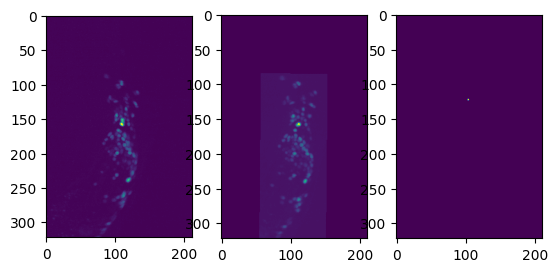

In [114]:
let
    dataset = "2023-07-25-01"
    t = 1001

    subplot(1,3,1)
    img_raw = read_img(NRRD(joinpath(param_paths[dataset]["path_dir_nrrd"], param_paths[dataset]["get_basename"](t,2)*".nrrd")))
    imshow(maxprj(img_raw,dims=3))

    subplot(1,3,2)
    img_raw = read_img(NRRD(joinpath(param_paths[dataset]["path_dir_nrrd_crop"], param_paths[dataset]["get_basename"](t,2)*".nrrd")))
    img_size = (322,210,77)
    img_uncrop = uncrop_img_roi(img_raw, data_dicts[dataset]["dict_param_crop_rot"][t], img_size)
    imshow(maxprj(img_uncrop,dims=3))

    subplot(1,3,3)
    hp = uncrop_single_point(dataset, param_paths, data_dicts, manual_labels, t; plot=true)
    print(hp)
end

### Sample hard cases from my manual inputs above

In [122]:
using Random
Random.seed!(42)

imgs_label = []
imgs_raw = []
max_len_per_dataset = 64 ### only take a few frames from each animal

dataset_len_dist = Dict()
contrast = 1.5
# savedir = "/data1/shared/head_detector_0124/head_detector_0124/head_pos_figs_hard"
savedir = "/store1/candy/prj_unet2d/data/head_pos_figs_hard"
hard_count = 0 ### how many manually labelled images went into the all_data.h5

for dataset in collect(keys(manual_labels))   # per animal
    dataset_root = dataset_paths[dataset]
    all_hard_tp = collect(keys(manual_labels[dataset]))
    n_samples = min(max_len_per_dataset, length(all_hard_tp))
    sample_hard_tp = shuffle(all_hard_tp)[1:n_samples]
    count = 0
    for t in sample_hard_tp
        path_file = joinpath(dataset_root, "NRRD_shearcorrect", param_paths[dataset]["get_basename"](t,2)*".nrrd")
        # print(path_file)
        if !isfile(path_file)
            continue
        end
        img_raw = read_img(NRRD(path_file))
        img_raw = img_raw[1:322,1:210,:]       
        img_raw = maxprj(img_raw,dims=3)
        img_label = zeros(Bool, size(img_raw))
        
        # img_raw = resample_img(img_raw, [2,2])
        # img_roi = zeros(Int32, size(img_raw))
        try
            hp = uncrop_single_point(dataset, param_paths, data_dicts, manual_labels, t) ### uncrop the manual head_pos
            # print(hp)
            img_label[[x for x in CartesianIndices(size(img_label)) if euclidean_dist(Tuple(x),Tuple(hp)) < 25]] .= 1
            # img_label[hp[1], hp[2]] .= 1
            # img_label = resample_img(img_label, [2,2]) ### downsample by a factor of 2
        catch e
            continue
        end
        push!(imgs_label, img_label)
        push!(imgs_raw, img_raw)

        img_max = percentile(reshape(img_raw, (prod(size(img_raw)),)), 100-contrast)
        img_min = percentile(reshape(img_raw, (prod(size(img_raw)),)), contrast)
        img_rgb = RGB.(max.(0,min.(1,(img_raw .- img_min) ./ (img_max - img_min))), img_label, 0)
        save(joinpath(savedir, "$(dataset)-$(t).png"), img_rgb)
        count += 1
    end
    dataset_len_dist[dataset] = count
    hard_count += count
end

/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t0791_ch2.nrrd/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t1001_ch2.nrrd/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t0579_ch2.nrrd/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t0580_ch2.nrrd/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t0631_ch2.nrrd/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t0955_ch2.nrrd/data1/prj_starvation/data_processed/2023-07-25-01_output/NRRD_shearcorrect/2023-07-25-01_t0767_ch2.nrrd/data1/prj_starvation/data_processed/2023-09-13-02_output/NRRD_shearcorrect/2023-09-13-02_t0838_ch2.nrrd/data1/prj_starvation/data_processed/2023-09-13-02_output/NRRD_shearcorrect/2023-09-13-02_t0836_ch2.nrrd/data1/prj_starvation/data_processed/2023-09-13-02_output/NRRD_s

In [123]:
dataset_len_dist

Dict{Any, Any} with 7 entries:
  "2023-07-25-01" => 5
  "2023-09-13-02" => 64
  "2023-09-19-01" => 7
  "2023-09-29-01" => 7
  "2023-08-01-01" => 12
  "2023-09-27-14" => 8
  "2023-07-24-20" => 17

In [124]:
hard_count

120

### Sample easy cases from data_dicts at the successfully registered time points

In [125]:
using Random
Random.seed!(42)
contrast = 1.5
# savedir = "/data1/shared/head_detector_0124/head_detector_0124/head_pos_figs_easy"
savedir = "/store1/candy/prj_unet2d/data/head_pos_figs_easy"
easy_count = 0 ### how many automatically labelled images went into the all_data.h5
max_per_animal = 32

for dataset in keys(data_dicts) # per animal
    if dataset in ["2023-09-29-01", "2023-07-25-01"] ### these two datasets are not used for easy cases at all
        continue
    end
    dataset_root = dataset_paths[dataset]
    
    ### sample easy cases from the time points of known high registration quality
    ta = data_dicts[dataset]["traces_array_quality"]
    valid_timepts = shuffle([t for t in 1:size(ta,2) if sum(ta[:,t] .> 0) > 0.9 * length(ta[:,t])])
    
    ### if t is already included in the hard cases, don't double count
    if haskey(dataset_len_dist, dataset)
        t_hard = collect(keys(manual_labels[dataset]))
        valid_timepts = setdiff(valid_timepts, t_hard)
        max_len_per_dataset = minimum([max_per_animal - dataset_len_dist[dataset], 0]) ### take very few from this animal since a lot of frames were already in the hard cases
    else
        max_len_per_dataset = copy(max_per_animal) ### only take a few frames from each animal that did not have manual head pos labels
    end
    
    count = 0
    n_samples = min(max_len_per_dataset, length(valid_timepts))
    for i = 1:n_samples
        t = valid_timepts[i]
        img_crop = nothing
        img_raw = nothing
        try
            path_ = joinpath(dataset_root, "NRRD_cropped", param_paths[dataset]["get_basename"](t,2)*".nrrd")
            img_crop = read_img(NRRD(path_))
        catch e
            continue
        end
        try
            path_ = joinpath(dataset_root, "NRRD_shearcorrect", param_paths[dataset]["get_basename"](t,2)*".nrrd")
            img_raw = read_img(NRRD(path_))
        catch e
            path_ = joinpath(dataset_root, "NRRD", param_paths[dataset]["get_basename"](t,2)*".nrrd")
            img_raw = read_img(NRRD(path_))
        end
        img_raw = img_raw[1:322,1:210,:]
        img_roi = zeros(Bool, size(img_crop))
        head_pt = nothing
        try
            hp = data_dicts[dataset]["head_pos"][t]
            img_roi[hp[1],hp[2],1] = 1
            img_label = maxprj(uncrop_img_roi(img_roi, data_dicts[dataset]["dict_param_crop_rot"][t], size(img_raw)),dims=3)
            head_pt = findall(img_label .== 1)[1]
        catch e
            # println("error happened: $hp $e\n")
            continue
        end
        img_raw = maxprj(img_raw,dims=3)
        img_label = zeros(Bool, size(img_raw))
        img_label[[x for x in CartesianIndices(size(img_label)) if euclidean_dist(Tuple(x),Tuple(head_pt)) < 25]] .= 1
        # img_raw = resample_img(img_raw, [2,2])
        # img_label = resample_img(img_label, [2,2], dtype="label")
        push!(imgs_label, img_label)
        push!(imgs_raw, img_raw)

        img_max = percentile(reshape(img_raw, (prod(size(img_raw)),)), 100-contrast)
        img_min = percentile(reshape(img_raw, (prod(size(img_raw)),)), contrast)
        img_rgb = RGB.(max.(0,min.(1,(img_raw .- img_min) ./ (img_max - img_min))), img_label, 0)
        save(joinpath(savedir, "$(dataset)-$(t).png"), img_rgb)
        # print("$(count): $(dataset) - $(t) \n")
        count += 1
    end
    if haskey(dataset_len_dist, dataset)
        dataset_len_dist[dataset] += count
    else
        dataset_len_dist[dataset] = count
    end
    easy_count += count
end

In [126]:
easy_count

3379

In [127]:
dataset_len_dist

Dict{Any, Any} with 168 entries:
  "2024-04-15-03" => 29
  "2023-08-23-02" => 0
  "2023-08-23-23" => 0
  "2023-09-27-01" => 29
  "2023-06-24-28" => 0
  "2024-05-02-13" => 0
  "2022-07-12-13" => 29
  "2022-07-26-38" => 31
  "2023-07-14-08" => 30
  "2023-10-06-07" => 29
  "2022-06-14-07" => 30
  "2023-06-05-01" => 28
  "2022-07-27-31" => 29
  "2023-09-19-01" => 7
  "2023-07-07-18" => 0
  "2023-07-28-04" => 0
  "2023-08-22-08" => 0
  "2023-06-23-08" => 29
  "2023-05-04-01" => 29
  "2023-07-25-11" => 29
  "2023-01-10-07" => 31
  "2023-08-02-01" => 30
  "2023-10-03-02" => 0
  "2023-06-29-01" => 30
  "2023-05-26-08" => 26
  ⋮               => ⋮

In [128]:
sum(values(dataset_len_dist))

3499

In [129]:
### write into h5
path_new_h5 = "/store1/candy/prj_unet2d/data/preCropNet.h5"

h5open(path_new_h5, "w") do f
    for i=1:length(imgs_label)
        d = "$(i)"
        create_group(f, d)
        f[d]["img"] = UInt16.(imgs_raw[i])   #UNet2D.standardize(Float32.(imgs_raw[i])) #### change!!
        f[d]["label"] = imgs_label[i]
    end
end